# Segmentation Of Online Sales Data

#### This notebook is final part of the research conducted on the IEEE Paper Machine Learning approach to study and segment customers of online sales data for better and efficient marketing purposes. The previous part of the first set of pre-processing from a huge data can be referred to another notebook. In this notebook we are going to pre-process, visualize and study before classifying them to find meaningful customer segments using 4 Machine Learning Algorithms (K - Means, Agglomerative, Mean Shift and DBSCAN).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("online_leads.csv")
df.head()

,Unnamed: 0,Name,age,degree,salary,experience
0,4,Rajendran ramaiyan,54,BACHELORS,1500000,240
1,6,Krishan kumar,36,BACHELORS,3840000,81
2,7,Dhanush kumar,23,BACHELORS,180000,1
3,10,Krishna kumar,36,BACHELORS,9157500,104
4,11,Deepa shankar,46,OTHERS,2660000,204


In [3]:
# Name is not needed for analysis purposes, so we can remove it
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [4]:
df.head()

,Name,age,degree,salary,experience
0,Rajendran ramaiyan,54,BACHELORS,1500000,240
1,Krishan kumar,36,BACHELORS,3840000,81
2,Dhanush kumar,23,BACHELORS,180000,1
3,Krishna kumar,36,BACHELORS,9157500,104
4,Deepa shankar,46,OTHERS,2660000,204


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,3107.0,3.474960e+01,9.138858e+00,1.0,29.0,34.0,40.0,71.0
salary,3107.0,2.352315e+06,5.629336e+06,5000.0,360000.0,770000.0,1700000.0,102000000.0
experience,3107.0,1.204110e+02,7.846839e+01,0.0,60.0,109.0,168.0,516.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3107 entries, 0 to 3106
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        3107 non-null   object
 1   age         3107 non-null   int64 
 2   degree      3107 non-null   object
 3   salary      3107 non-null   int64 
 4   experience  3107 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 121.5+ KB


## Data Visualization

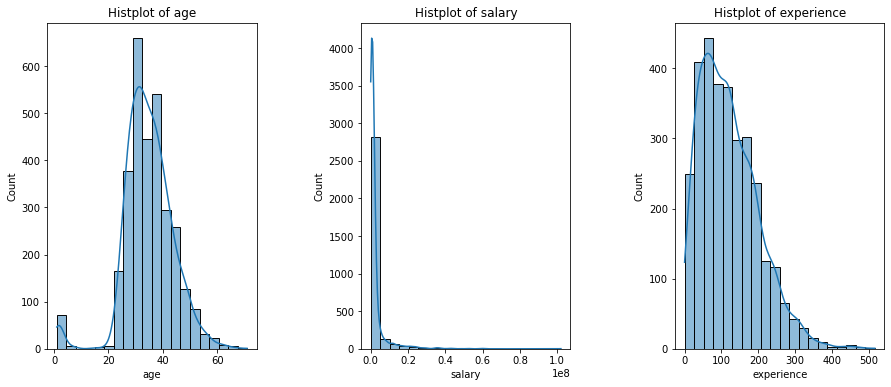

In [7]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for col in ['age' , 'salary' , 'experience']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.histplot(data=df, x=col, bins = 20, kde=True)
    plt.title('Histplot of {}'.format(col))
plt.show()

* We can see much of the distribution of the data is centered meaning most of them fall in the major crisis.

[]

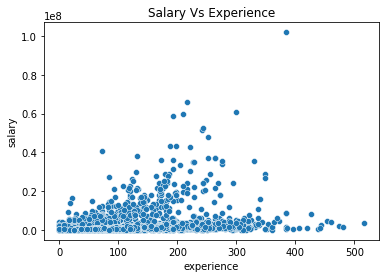

In [8]:
plt.title("Salary Vs Experience")
sns.scatterplot(data=df, x="experience", y="salary")
plt.plot()

<AxesSubplot:xlabel='degree', ylabel='count'>

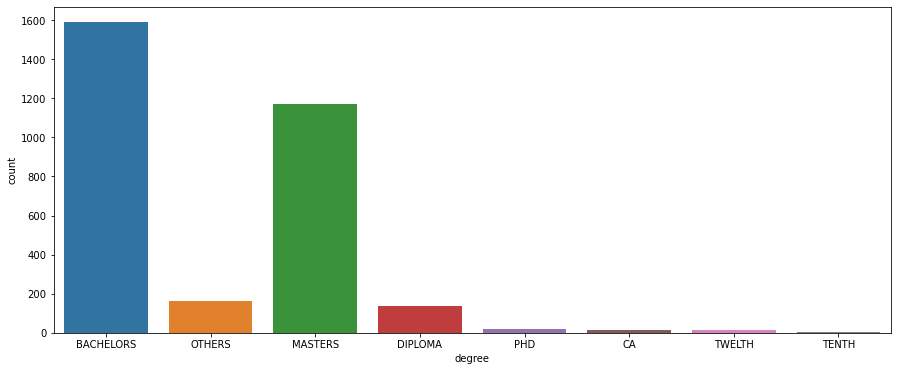

In [9]:
plt.figure(1 , figsize = (15 , 6))
sns.countplot(x=df['degree'])

###### Let's Check for some outliers in the data

<AxesSubplot:xlabel='age'>

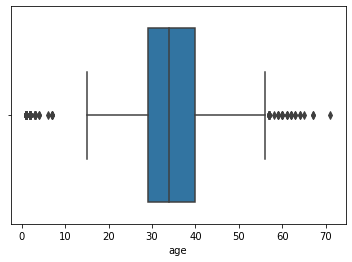

In [10]:
sns.boxplot(x=df["age"])

<AxesSubplot:xlabel='salary'>

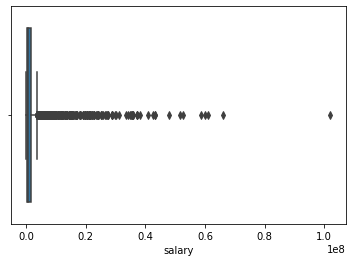

In [11]:
sns.boxplot(x=df["salary"])

<AxesSubplot:xlabel='experience'>

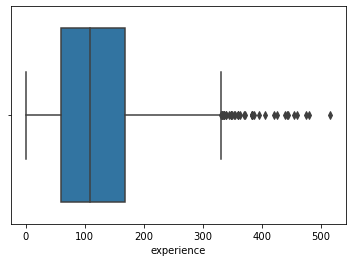

In [12]:
sns.boxplot(x=df["experience"])

* There are lot of outliers in the data which needed to be taken care of.

## Data Pre-Processing

In [13]:
df[df['salary'] < 100000]

,Name,age,degree,salary,experience
175,Naveen jai shathya,29,BACHELORS,15000,55
176,Ganeshkumar.m,28,BACHELORS,20000,46
193,Suriya rajavadivoo,25,BACHELORS,15000,9
197,Dhurai murugan. a,22,BACHELORS,5000,3
216,Karthik k,35,BACHELORS,80000,100
...,...,...,...,...,...
2633,Abhinab dutta gupta,27,BACHELORS,60000,5
2836,Siva paulsamy,33,BACHELORS,60000,133
2895,M.tamzharasan,26,BACHELORS,15000,31
2948,Karthikeyan narayanamoorthy,30,OTHERS,10000,24


* Since the salary column is in huge amount we are bringing down the scale in ten thousands for visualisation


In [14]:
salaryTPA = []
for salary in df['salary']:
    salaryTPA.append(salary / 10000)

In [15]:
df['salaryTPA'] = salaryTPA
df.head()

,Name,age,degree,salary,experience,salaryTPA
0,Rajendran ramaiyan,54,BACHELORS,1500000,240,150.00
1,Krishan kumar,36,BACHELORS,3840000,81,384.00
2,Dhanush kumar,23,BACHELORS,180000,1,18.00
3,Krishna kumar,36,BACHELORS,9157500,104,915.75
4,Deepa shankar,46,OTHERS,2660000,204,266.00


* Since degree is a categorical data and has multiple data we can rank the degree based on the below format
'''
PHd = 5
Masters = 4
CA = 3.8
Bachelors = 3
Diploma = 2
Twelth = 1.5
Tenth = 1
Encode Others = 2.5 (between Diploma and Bachelors) as I seen in the data manually they could be diploma holders or bachelors
'''

In [16]:

mapping = {
    'PHD':5,
    'MASTERS':4,
    'CA':3.8,
    'BACHELORS':3,
    'OTHERS':2.5,
    'DIPLOMA':2,
    'TWELTH':1.5,
    'TENTH':1
}
transformed_degree = []
for degree in df['degree']:
    transformed_degree.append(mapping[degree])

In [17]:
df['transformed_degree'] = transformed_degree
df.head()

,Name,age,degree,salary,experience,salaryTPA,transformed_degree
0,Rajendran ramaiyan,54,BACHELORS,1500000,240,150.00,3.0
1,Krishan kumar,36,BACHELORS,3840000,81,384.00,3.0
2,Dhanush kumar,23,BACHELORS,180000,1,18.00,3.0
3,Krishna kumar,36,BACHELORS,9157500,104,915.75,3.0
4,Deepa shankar,46,OTHERS,2660000,204,266.00,2.5


In [18]:
df[df['age'] < 18]

,Name,age,degree,salary,experience,salaryTPA,transformed_degree
31,Sailekha.m,7,BACHELORS,270000,108,27.0,3.0
110,Siva kumar,1,OTHERS,4980000,102,498.0,2.5
149,Roshini s,1,BACHELORS,5040000,17,504.0,3.0
198,A r sakthivel aathithan,1,BACHELORS,300000,24,30.0,3.0
279,Alex lenin j,15,MASTERS,530000,120,53.0,4.0
...,...,...,...,...,...,...,...
3025,Aathi lakshmi,2,MASTERS,130000,18,13.0,4.0
3036,Shyam sundar,1,OTHERS,1200000,148,120.0,2.5
3050,Sheik mohammed p,2,BACHELORS,480000,91,48.0,3.0
3067,Mohammed abbas m,1,BACHELORS,1800000,115,180.0,3.0


* For those age less than 18 add 18 with experience

In [19]:
transformed_age = []
itr = 0
for age in df['age']:
    if age < 19:
        value = 0
        if df._get_value(itr, 'degree')  == 'MASTERS':
            value += 5
        elif df._get_value(itr, 'degree')  == 'PHD':
            value += 6
        elif df._get_value(itr, 'degree')  == 'BACHELORS' or df._get_value(itr, 'degree')  == 'CA':
            value += 4
        value = value + (df._get_value(itr, 'experience') // 12) + 18
        transformed_age.append(value)
    else:
        transformed_age.append(age)
    itr += 1

In [20]:
df['transformed_age'] = transformed_age
df.head()

,Name,age,degree,salary,experience,salaryTPA,transformed_degree,transformed_age
0,Rajendran ramaiyan,54,BACHELORS,1500000,240,150.00,3.0,54
1,Krishan kumar,36,BACHELORS,3840000,81,384.00,3.0,36
2,Dhanush kumar,23,BACHELORS,180000,1,18.00,3.0,23
3,Krishna kumar,36,BACHELORS,9157500,104,915.75,3.0,36
4,Deepa shankar,46,OTHERS,2660000,204,266.00,2.5,46


In [21]:
df[df['transformed_age'] < 18]

,Name,age,degree,salary,experience,salaryTPA,transformed_degree,transformed_age


In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,3107.0,3.474960e+01,9.138858e+00,1.0,29.0,34.0,40.0,71.0
salary,3107.0,2.352315e+06,5.629336e+06,5000.0,360000.0,770000.0,1700000.0,102000000.0
experience,3107.0,1.204110e+02,7.846839e+01,0.0,60.0,109.0,168.0,516.0
salaryTPA,3107.0,2.352315e+02,5.629336e+02,0.5,36.0,77.0,170.0,10200.0
transformed_degree,3107.0,3.312971e+00,6.132229e-01,1.0,3.0,3.0,4.0,5.0
transformed_age,3107.0,3.544641e+01,7.643452e+00,19.0,30.0,34.0,40.0,71.0


In [23]:
df.isnull().sum()

Name                  0
age                   0
degree                0
salary                0
experience            0
salaryTPA             0
transformed_degree    0
transformed_age       0
dtype: int64

## Further Pre-Processing and Visualization

*  Extracting only the features from the column

In [24]:
new_df = df[['experience', 'salaryTPA', 'transformed_degree', 'transformed_age']]
new_df.head()

,experience,salaryTPA,transformed_degree,transformed_age
0,240,150.00,3.0,54
1,81,384.00,3.0,36
2,1,18.00,3.0,23
3,104,915.75,3.0,36
4,204,266.00,2.5,46


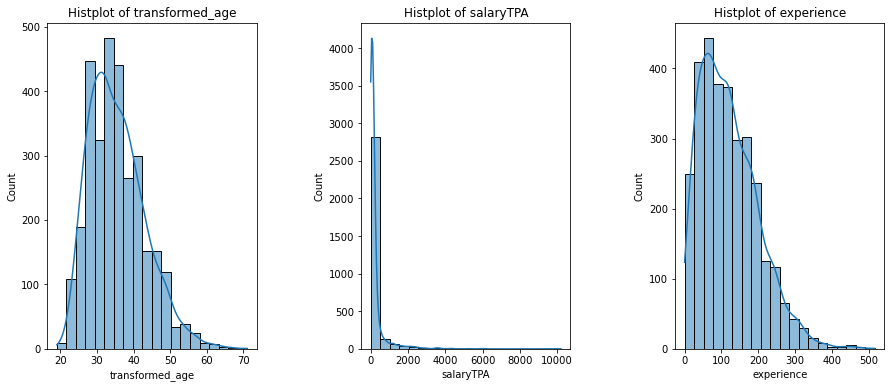

In [25]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for col in ['transformed_age' , 'salaryTPA' , 'experience']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.histplot(data=new_df, x=col, bins = 20, kde=True)
    plt.title('Histplot of {}'.format(col))
plt.show()

In [26]:
# Printing some meaningful stats of the data
print("-----------Variance-----------")
print(new_df.var())

print("-----------Co-Variance-----------")
print(new_df.cov())

-----------Variance-----------
experience              6157.287876
salaryTPA             316894.256941
transformed_degree         0.376042
transformed_age           58.422353
dtype: float64
-----------Co-Variance-----------
                      experience      salaryTPA  transformed_degree  \
experience           6157.287876   11248.823375            8.024416   
salaryTPA           11248.823375  316894.256941           23.714173   
transformed_degree      8.024416      23.714173            0.376042   
transformed_age       520.202812     944.102350            1.045657   

                    transformed_age  
experience               520.202812  
salaryTPA                944.102350  
transformed_degree         1.045657  
transformed_age           58.422353  


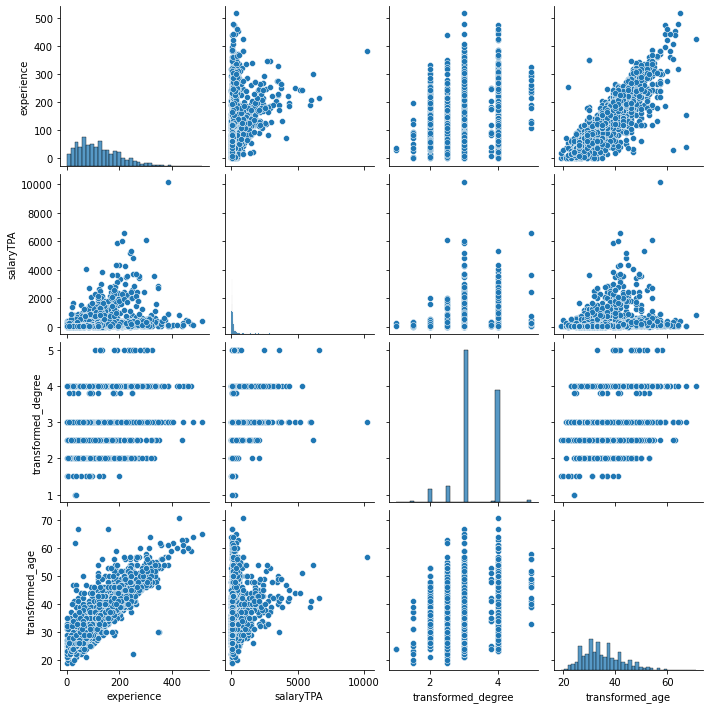

In [27]:
sns.pairplot(new_df)

##### Creating a separate dataframe for outlier removal and scaling which needs to be used only in some models

In [28]:
scaledDf = new_df.copy()
scaledDf.head()

,experience,salaryTPA,transformed_degree,transformed_age
0,240,150.00,3.0,54
1,81,384.00,3.0,36
2,1,18.00,3.0,23
3,104,915.75,3.0,36
4,204,266.00,2.5,46


###### Remove Outliers using IQR logic

In [29]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

lr, ur = remove_outlier(scaledDf['experience'])
scaledDf['experience']=np.where(scaledDf['experience']>ur,ur,scaledDf['experience'])
scaledDf['experience']=np.where(scaledDf['experience']<lr,lr,scaledDf['experience'])

lr, ur = remove_outlier(scaledDf['salaryTPA'])
scaledDf['salaryTPA']=np.where(scaledDf['salaryTPA']>ur,ur,scaledDf['salaryTPA'])
scaledDf['salaryTPA']=np.where(scaledDf['salaryTPA']<lr,lr,scaledDf['salaryTPA'])

lr, ur = remove_outlier(scaledDf['transformed_age'])
scaledDf['transformed_age']=np.where(scaledDf['transformed_age']>ur,ur,scaledDf['transformed_age'])
scaledDf['transformed_age']=np.where(scaledDf['transformed_age']<lr,lr,scaledDf['transformed_age'])

In [30]:
scaledDf.head()

,experience,salaryTPA,transformed_degree,transformed_age
0,240.0,150.0,3.0,54.0
1,81.0,371.0,3.0,36.0
2,1.0,18.0,3.0,23.0
3,104.0,371.0,3.0,36.0
4,204.0,266.0,2.5,46.0


In [31]:
scaledDf.describe().T

,count,mean,std,min,25%,50%,75%,max
experience,3107.0,119.732861,76.205116,0.0,60.0,109.0,168.0,330.0
salaryTPA,3107.0,124.355687,116.594866,0.5,36.0,77.0,170.0,371.0
transformed_degree,3107.0,3.312971,0.613223,1.0,3.0,3.0,4.0,5.0
transformed_age,3107.0,35.382041,7.445823,19.0,30.0,34.0,40.0,55.0


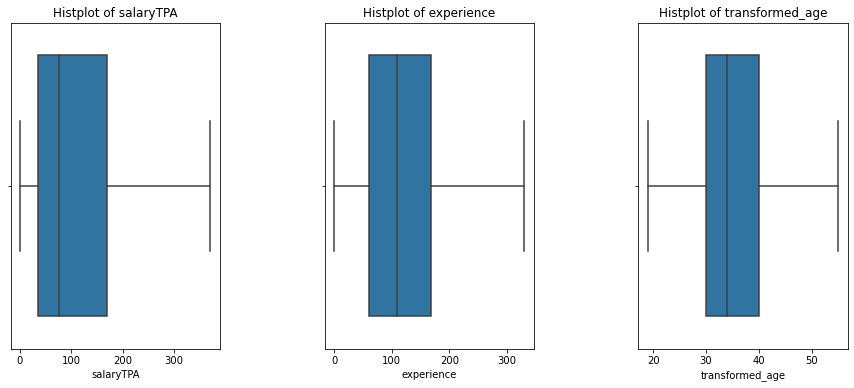

In [32]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for col in ['salaryTPA' , 'experience' , 'transformed_age']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.boxplot(data=scaledDf, x=col)
    plt.title('Histplot of {}'.format(col))
plt.show()

###### As you can see all the outliers in the data have been removed

##### Since some models like K-Means and Agglomerative are sensitive to outliers we need to scale the data before proceeding

In [33]:
from sklearn.preprocessing import StandardScaler


X = StandardScaler()


scaled_df = X.fit_transform(scaledDf)

scaled_df

array([[ 1.57845699,  0.21997917, -0.51045242,  2.50085933],
       [-0.50835296,  2.11573651, -0.51045242,  0.08300747],
       [-1.55832023, -0.91232839, -0.51045242, -1.66321888],
       ...,
       [ 0.00350609, -0.6292515 , -0.51045242, -0.05131764],
       [ 0.58098808, -0.63782959, -0.51045242,  0.21733257],
       [ 2.36593244,  1.93559667, -1.32594793,  2.36653422]])

## Model Building

In [41]:
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.neighbors import NearestNeighbors

* Finding the K through the elbow method

In [35]:
wss = []
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [36]:
for index, rate in enumerate(wss):
    if index == 0:
        print("Cluster " + str(index) + " Diff in wss value: Not Applicable")
    else:
        print("Cluster " + str(index) + " Diff in wss value: " + str(wss[index - 1] - wss[index]))

Cluster 0 Diff in wss value: Not Applicable
Cluster 1 Diff in wss value: 4795.665721772915
Cluster 2 Diff in wss value: 1516.060679773519
Cluster 3 Diff in wss value: 1191.5606497332183
Cluster 4 Diff in wss value: 913.0839932179906
Cluster 5 Diff in wss value: 530.6114988001755
Cluster 6 Diff in wss value: 400.5488140514585
Cluster 7 Diff in wss value: 249.29651122614723
Cluster 8 Diff in wss value: 258.052294784256
Cluster 9 Diff in wss value: 226.24787874759386


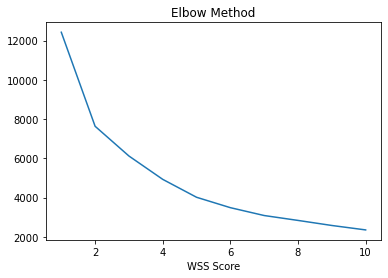

In [37]:
plt.title('Elbow Method')
plt.xlabel('WSS Score')
plt.plot(range(1,11), wss)
plt.show()

In [38]:
k_means = KMeans(n_clusters = 2)
k_means.fit(scaled_df)
k_means_labels = k_means.labels_

* Finding number of clusters for Agglomerative model

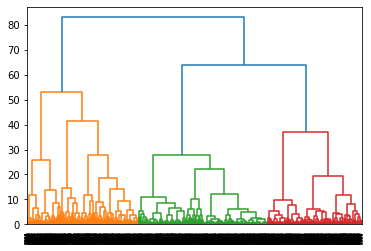

In [39]:
wardlink = linkage(scaled_df, method = 'ward')
dend = dendrogram(wardlink)

In [43]:
agglo_clusters = fcluster(wardlink, 3, criterion='maxclust')
agglo_clusters

array([1, 1, 2, ..., 2, 1, 1], dtype=int32)

* Estimating the bandwidth and running the Mean-Shift model

In [44]:
bandwidth = estimate_bandwidth(new_df, quantile=0.2)
bandwidth

197.5955459070833

In [45]:
ms = MeanShift(bandwidth = bandwidth)
ms.fit(new_df)
ms_labels = ms.labels_
np.unique(ms.labels_)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
      dtype=int64)

* Finding the epsilon and minsamples for DBSCAN
- For minsamples we are going to follow rule of thumb which says to have to the minsample >= no of features + 1
- For finding the epsilon value we are going to K-Nearest neighbours method

In [51]:
neighbors = NearestNeighbors(n_neighbors = 5)
neighbors_fit = neighbors.fit(new_df)
unsortedDistances, indices = neighbors_fit.kneighbors(new_df)

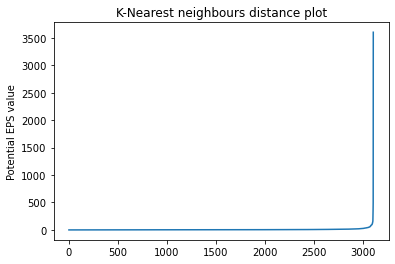

In [52]:
distances = np.sort(unsortedDistances, axis=0)
distance = distances[:,1]
plt.title("K-Nearest neighbours distance plot")
plt.ylabel('Potential EPS value')
plt.plot(distance)

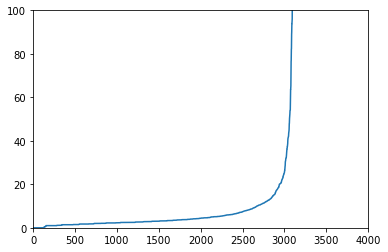

In [53]:
# Zooming the picture to find the eps value
plt.xlim([0, 4000])
plt.ylim([0, 100])
plt.plot(distance)
plt.show()

- eps value is found to be 22.

In [59]:
dbscan = DBSCAN(eps=22, min_samples=5)
dblabels = dbscan.fit_predict(new_df)
np.unique(dblabels)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16], dtype=int64)

#### Analysis

In [57]:
print("K-Means Silhouette_score")
print(silhouette_score(new_df, k_means_labels))

K-Means Silhouette_score
0.3142263317501192


In [58]:
print("* Finding number of clusters for Agglomerative model Silhouette_score")
print(silhouette_score(new_df, agglo_clusters))

* Finding number of clusters for Agglomerative model Silhouette_score
-0.0656965098933261


In [60]:
print("Mean Shift Silhouette_score")
print(silhouette_score(new_df, ms_labels))

Mean Shift Silhouette_score
0.7682485865625035


In [61]:
print("DBSCAN Silhouette_score")
print(silhouette_score(new_df, dblabels))

DBSCAN Silhouette_score
0.2238630362656037


- Silhouette_score is one of the metrics for data analysis and calculates score only better for k-means. DBSCAN and Mean shift produce better outputs when considered with real world scenario.

### We have seen how the Mean Shift and DBSCAN have given good results and better segements for customer segmentation. To know more about the result and anlysis of the algorithms look into the paper.

# Thank you !!